## А/B тестирование

План занятия:
1. Что такое А/B тесты?
2. Пайплайн проведения теста
3. Разберем пример

<img alt="" width="500" align="center" src="
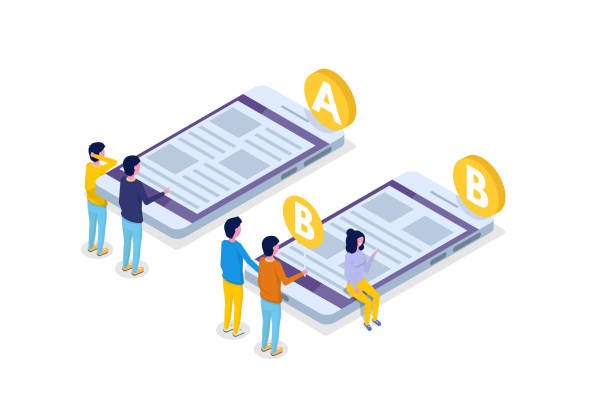
"/>

### Что такое A/B-тесты?

A/B-тестирование — это метод сравнения двух версий одного элемента (например, веб-страницы, рекламы или кнопки) для определения, какая из них демонстрирует лучшие результаты.

#### Как это работает:
1. **Разделение аудитории**:
   - **Группа A (контрольная)** получает оригинальную версию.
   - **Группа B (тестовая)** получает изменённую версию.
2. **Сбор данных**: измеряются ключевые показатели (например, количество кликов, конверсий, продаж).
3. **Анализ результатов**: сравниваются показатели обеих групп, чтобы определить наиболее эффективный вариант.

#### Зачем нужны A/B-тесты:
- **Повышение эффективности**: позволяют оптимизировать ключевые метрики, такие как конверсии, кликабельность, время на сайте или доход.
- **Объективность решений**: тесты основаны на анализе данных, что исключает субъективность и интуитивные догадки.
- **Выявление причинно-следственных связей**: в отличие от анализа корреляций, A/B тесты выявляют причинно-следственную связь между изменением и результатом. Например, они помогают подтвердить, что изменение текста кнопки увеличило конверсии, а не просто обнаружить, что эти показатели как-то связаны

A/B тесты полезны для оптимизации процессов, в которых важна реакция пользователей.

#### Пример применения:
**Ситуация**: Интернет-магазин хочет проверить, влияет ли длительность отображения скидки на сайте на средний чек.

- **Гипотеза**: увеличение времени отображения скидки на главной странице сайта повысит среднюю сумму чека.
- **Метод**: A/B-тестирование, где:
  - Группа A видит скидку 1 минуту (контрольная группа).
  - Группа B видит скидку 2 минуты (тестовая группа).
- **Метрика**: средний чек.

**Результаты**:
- Группа A: средний чек — 1500 рублей.
- Группа B: средний чек — 1700 рублей.

После проведения статистического анализа подтверждается, что разница между группами значима.

**Вывод**:  
Результаты A/B-теста демонстрируют, что увеличение времени отображения скидки приводит к статистически значимому росту среднего чека. Компания принимает решение внедрить это изменение на весь сайт, что способствует увеличению общей конверсии.

Рассмотрим приведенный пример А/B теста в Python


In [1]:
import numpy as np
import pandas as pd
from math import ceil
#для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
#библиотеки статистических тестов
from scipy import stats
import statsmodels.stats.power as smp
from statsmodels.stats import proportion

pd.options.mode.chained_assignment = None

In [2]:
# Генерация данных чеков пользователей
np.random.seed(42)
group_a = np.random.normal(loc=1500, scale=100, size=1000)
group_b = np.random.normal(loc=1700, scale=100, size=1000)

Средний чек в группе B выше, чем в группе А

In [3]:
group_a.mean(), group_b.mean()

(1501.9332055822326, 1707.0836237249155)

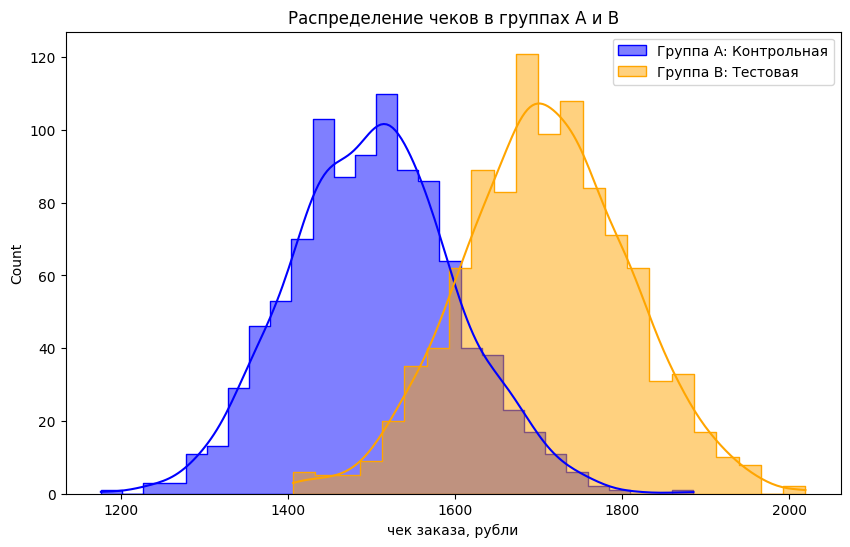

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(group_a, color='blue', label='Группа A: Контрольная', kde=True, element="step")
sns.histplot(group_b, color='orange', label='Группа B: Тестовая', kde=True, element="step")
plt.title('Распределение чеков в группах A и B')
plt.xlabel('чек заказа, рубли')
plt.legend()
plt.show()

Мы наблюдаем значительные различия в распределении чеков между группами, что позволяет предположить, что различия в среднем чеке не являются случайными, а действительно имеют место. Однако возможен и иной сценарий:

In [5]:
# Генерация данных чеков пользователей
np.random.seed(42)
group_a = np.random.normal(loc=1500, scale=600, size=1000)
group_b = np.random.normal(loc=1700, scale=600, size=1000)

### Задание 1

Напишите код для расчета средних для обеих групп

In [6]:
# ваш код
group_a.mean(), group_b.mean()

(1511.599233493395, 1742.5017423494935)

Средний чек в группе B все еще выше, чем в группе А

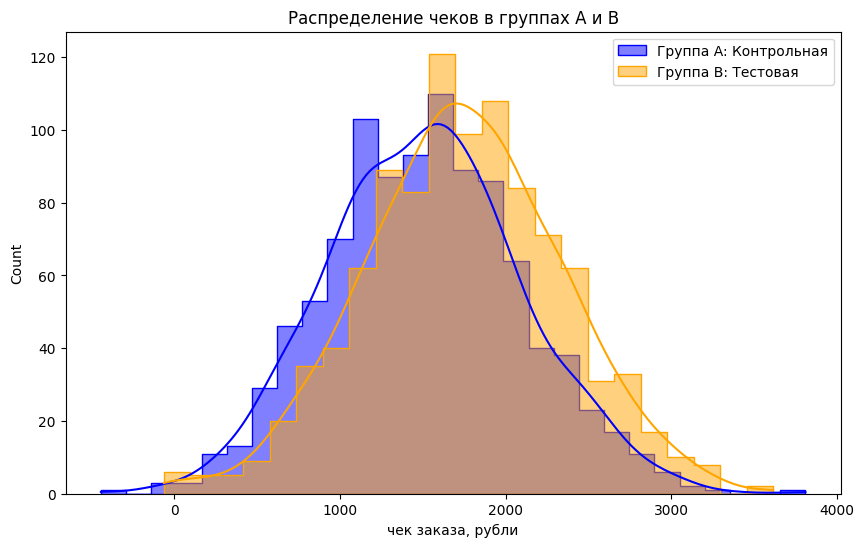

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(group_a, color='blue', label='Группа A: Контрольная', kde=True, element="step")
sns.histplot(group_b, color='orange', label='Группа B: Тестовая', kde=True, element="step")
plt.title('Распределение чеков в группах A и B')
plt.xlabel('чек заказа, рубли')
plt.legend()
plt.show()

Однако в данном случае распределения стали практически идентичными, хотя средние значения остались неизменными. В такой ситуации уже нельзя с уверенностью утверждать, что повышение среднего чека в группе B по сравнению с группой А не является случайным.

Именно поэтому на практике применяются статистические критерии, которые позволяют с определённой уверенностью определить, является ли наблюдаемое различие случайным.

### t-тест (критерий Стьюдента)

Одним из таких критериев является t-тест, который может использоваться для сравнения средних у двух выборок.
Для применения этого теста необходимо соблюдение двух предпосылок:
1. Данные должны быть распределены нормально или количество наблюдений должно быть достаточно большим*.
2. Наблюдения внутри и между групп должны быть независимыми.

*Считается, что для применения теста необходимо иметь более 30 наблюдений, однако на практике следует проверять, поскольку если распределение сильно перекошено, может понадобиться больше наблюдений.

Для вычисления статистики критерия необходимо выполнить следующие шаги:

1. Рассчитать выборочное среднее в группе A: $\bar X_A$ и в группе B: $\bar X_B$
2. Рассчитать выборочную дисперсию в группе A: $\hat \sigma^2_A $ и в группе B: $\hat \sigma^2_B $
3. Определить кол-во наблюдений в группе А: $n_A$ и в группе B: $n_B$

Для выборки ${X_1, X_2,\dots X_n}$

$$\bar X = \frac{\sum_{i=1}^{n} X_i}{n}$$

$$\hat \sigma^{2} = \frac{\sum_{i=1}^{n} (X_i- \bar X )^2 }{n}$$

3. Посчитать статистику

$$t_{st} = \frac{\bar X_A- \bar X_B}{\sqrt{\frac{\hat \sigma^{2}_A }{n_A}+\frac{\hat \sigma^{2}_B }{n_B}}}$$

После расчета статистика далее:
- либо переводится в вероятность (p-value), а затем сравнивается с порогом вероятности (например, 5%)
- либо сравнивается с некоторым числом, соответствующим порогу вероятности

Применим этот тест для обоих наших примеров.

In [8]:
# 1 пример
# Генерация данных чеков пользователей
np.random.seed(42)
group_a = np.random.normal(loc=1500, scale=100, size=1000)
group_b = np.random.normal(loc=1700, scale=100, size=1000)

# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05: # сравниваем с 5%
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = -46.41246962708876, p-value = 1.09e-319
t-тест показал наличие значимого отличия между группами


In [9]:
# 2 пример
# Генерация данных чеков пользователей
np.random.seed(42)
group_a = np.random.normal(loc=1500, scale=600, size=1000)
group_b = np.random.normal(loc=1700, scale=600, size=1000)

# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05: # сравниваем с 5%
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = -8.706421184453967, p-value = 6.441697673782856e-18
t-тест показал наличие значимого отличия между группами


Несмотря на то, что по графику различие выглядело незначительным, статистический тест показал, что оно всё же имеет место.

### Бонус: почему t-тест работает именно так?

Используя t-тест, мы стремимся определить, является ли разница между группами случайной.

**Что значит "случайной"?**  
Если вероятность получить разницу между группами, аналогичную нашей, или ещё более сильную, велика, это означает, что вероятность того, что такая разница возникла случайно, также высока. В таком случае можно предположить, что полученная разница не имеет статистической значимости. Эта вероятность называется p-value (о чём будет подробнее рассказано в следующих разделах).

**Почему важно учитывать более выраженные различия?**  
Наша цель — не просто вычислить вероятность получения разницы, подобной наблюдаемой, поскольку эта вероятность всегда будет относительно небольшой. Чтобы определить, случайно ли это отличие, необходимо понять, где оно располагается относительно распределения данных: в его хвосте или ближе к более вероятным значениям.

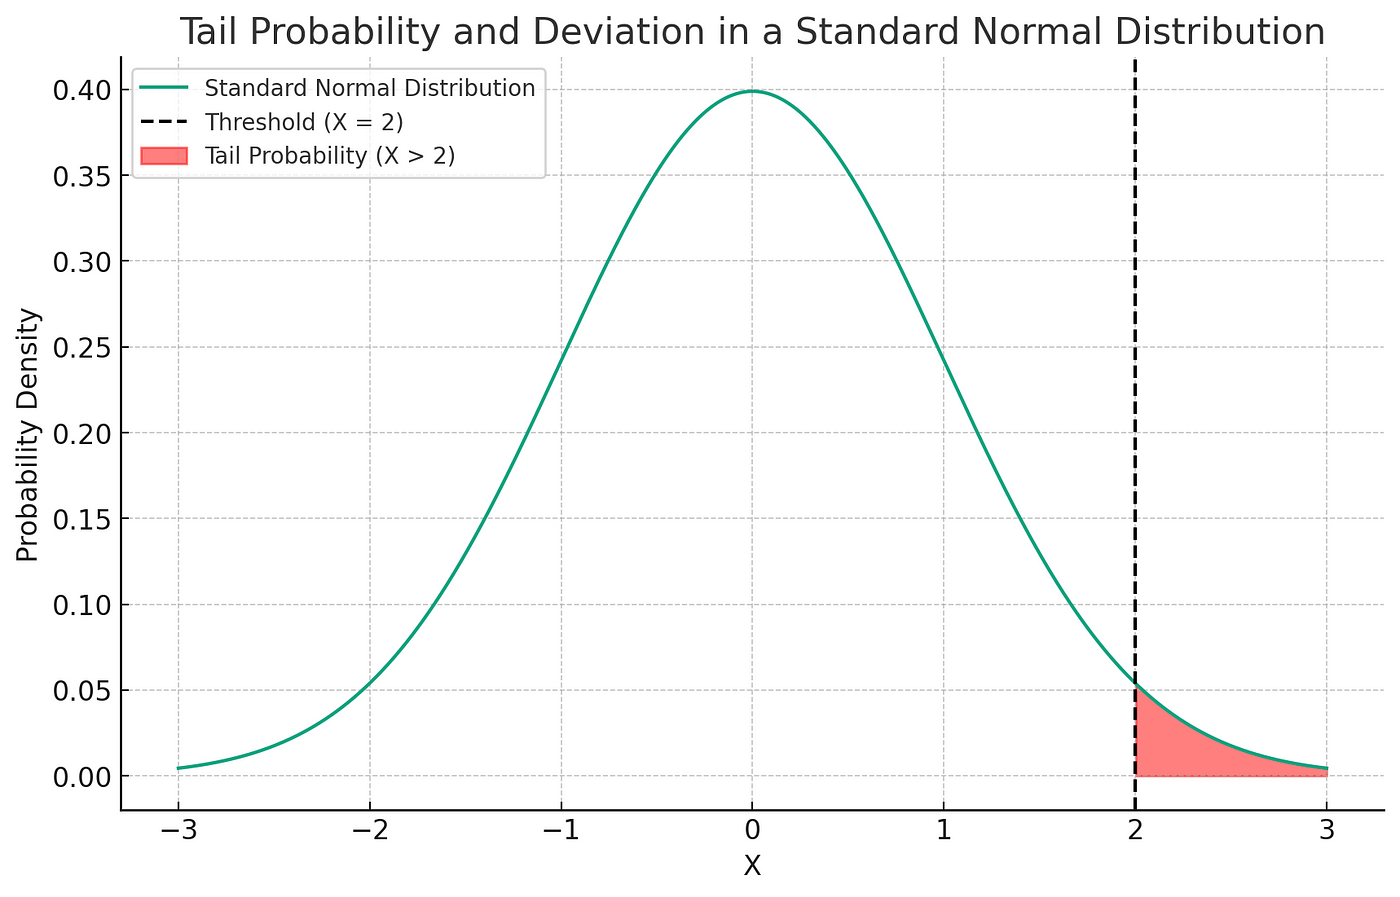

**Как вычислить эту вероятность?**  
С помощью ряда теорем мы можем воспользоваться следующим свойством: при достаточном количестве наблюдений разница средних между группами подчиняется определённому распределению, для которого существуют известные методы вычисления вероятности.

**Что считается "большой" вероятностью?**  
Обычно в качестве порога для большой вероятности принимается значение 5%. То есть, если вероятность превышает 5%, её считают достаточно большой.

**Как понять, что разница достаточно велика, если метрики имеют разные масштабы?**  
Чтобы сопоставить разницу средних, мы можем нормировать её, поделив на стандартное отклонение, переводя в единые условные единицы. Это позволит для любого эксперимента вычислить вероятность с учётом общей шкалы.

Именно так работает t-тест (тест Стьюдента). Он использует распределение Стьюдента, значения вероятностей которого были заранее рассчитаны с помощью вычислительных методов.

Теперь давайте рассмотрим, как организуется эксперимент от начала до конца.

## Пайплайн проведения теста

1. Идея для теста
2. Выбор метрики
3. Выбор параметров эксперимента
4. Длительность эксперимента
4. Запуск эксперимента
5. Мониторинг
6. Подведение итогов эксперимента

### Идея для эксперимента

Идея эксперимента начинается с общей задумки, которая уточняется до гипотезы. Важно определить, какое изменение тестируется и чем различаются группы, чтобы правильно интерпретировать результаты и понять, что повлияло на итог.

### Выбор метрики

<img alt="" width="500" align="center" src="
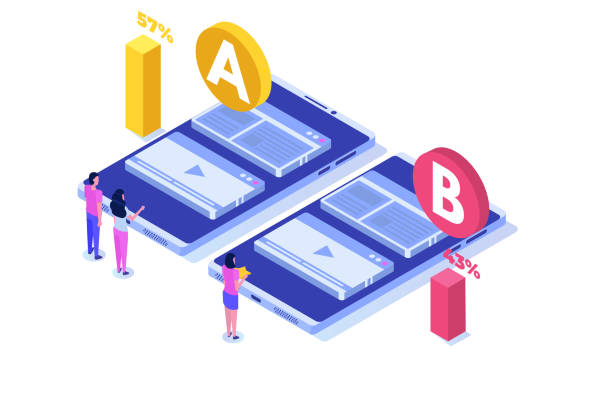
"
/>

Эксперимент должен фокусироваться на воздействии фичи на конкретную метрику, чтобы результаты были ясными и дизайн эксперимента соответствовал цели. В противном случае могут возникнуть сложности в интерпретации, и ресурсы могут быть потрачены неэффективно.

1. Зная цель эксперимента, бизнес может предсказать, как изменится поведение пользователей и какая метрика будет на это реагировать.

  **Пример:** команда машинного обучения разработала модель персонализации уведомлений для пользователей. Ожидаем, что более релевантные уведомления приведут к увеличению кликов, и метрика конверсии в клик будет расти.

2. Иногда мы заранее знаем, на какую метрику хотим повлиять, и строим эксперимент от обратного: исходя из целевой метрики, мы разрабатываем идею эксперимента и его дизайн, который позволит проверить предполагаемое изменение.

  **Пример:** наша цель — повысить конверсию в заполнение заявки на кредит. Идея эксперимента: автоматическое заполнение полей, для которых уже есть информация о клиенте. Мы проводим эксперимент, чтобы проверить гипотезу о том, что такое изменение повысит конверсию.

Лучше начинать с метрики: зная, на что хотим повлиять, мы разрабатываем фичи и проводим эксперименты. Это предотвращает ситуации, когда эксперимент проводится без чёткого понимания цели, что может привести к нецелесообразному использованию ресурсов.

### Выбор параметров эксперимента

После выбора метрики мы можем приступать к разработке дизайна эксперимента с учётом статистических аспектов. Метрика играет ключевую роль, поскольку она определяет, какой статистический критерий будет применяться, а также, как долго следует проводить эксперимент.

Длительность эксперимента зависит от нескольких факторов:

1. Ошибка I рода

Ошибка заключается в том, что мы делаем вывод о наличии эффекта, когда его на самом деле нет.

Создадим две идентичные группы и проверим, существует ли между ними значимое различие с помощью t-теста.

In [10]:
# Генерация двух одинаковых групп
np.random.seed(3)
group_a = np.random.normal(loc=100, scale=10, size=1000)
group_b = np.random.normal(loc=100, scale=10, size=1000)

In [11]:
group_a.mean(), group_b.mean()

(100.17284332980836, 99.23297607487035)

In [12]:
# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = 2.0798358507825623, p-value = 0.03766780185226453
t-тест показал наличие значимого отличия между группами


Проводя эксперимент, мы никогда не можем быть уверены, что не совершили ошибку. Мы можем лишь определить допустимую для нас вероятность ошибки. Ошибка I рода, также известная как уровень значимости, обычно устанавливается на уровне 5%. Это означает, что мы принимаем вероятность 5%, что тест покажет наличие эффекта, даже если его на самом деле нет.

В приведённом примере мы явно столкнулись с такой ошибкой, и это очевидно, но только потому, что данные были сгенерированы нами, и мы точно знаем, что их среднее значение должно быть одинаковым.

Чтобы убедиться в случайности ошибки, мы можем провести 1000 таких тестов и проверить, что в примерно 5% случаев тест укажет на наличие эффекта. Для этого отключим random.seed, чтобы выборка каждый раз была случайной.

In [13]:
false_positive = 0.0
num_tests = 1000
for i in range(num_tests):
    # Генерация двух одинаковых групп
    # np.random.seed(3)
    group_a = np.random.normal(loc=100, scale=10, size=1000)
    group_b = np.random.normal(loc=100, scale=10, size=1000)

    t_stat, p_value = stats.ttest_ind(group_a, group_b)
    if p_value < 0.05:
        false_positive += 1

first_type_error = false_positive / num_tests
print(f"Доля тестов с ложноположительным результатом: {first_type_error:.2%}")

Доля тестов с ложноположительным результатом: 5.40%


Мы уже несколько раз использовали p-value для определения результатов теста, давайте более подробно разберём, что это такое.

P-value — это вероятность получения наблюдаемых данных (или более экстремальных значений), при условии, что изменений в действительности нет.

В контексте A/B тестирования p-value применяется для оценки статистической значимости различий между двумя или более группами. Обычно в A/B тесте нулевая гипотеза заключается в том, что нет различий между группами (например, между контрольной и тестовой группами).

Интерпретация p-value:
- если p-value < $\alpha$, то мы отвергаем нулевую гипотезу и делаем вывод, что наблюдаемые различия статистически значимы;
- если p-value >= $\alpha$, то мы не можем отвергнуть нулевую гипотезу, и различия между группами не считаются статистически значимыми.

2. Ошибка II рода

Ошибка заключается в том, что мы не находим эффекта, когда он на самом деле существует.

Создадим две разные группы и проверим, существует ли между ними значимое различие с помощью t-теста.

In [14]:
# Генерация двух разных групп
np.random.seed(3)
group_a = np.random.normal(loc=100, scale=10, size=1000)
group_b = np.random.normal(loc=101, scale=10, size=1000)

In [15]:
group_a.mean(), group_b.mean()

(100.17284332980836, 100.23297607487035)

In [16]:
# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = -0.13306798202491701, p-value = 0.8941530166719998
t-тест показал отсутствие значимых отличий между группами


Ошибка II рода связана с мощностью статистического критерия: мощность = 1 - ошибка II рода. Мощность теста — это вероятность обнаружить эффект, если он действительно существует. Стандартное значение мощности обычно принимается равным 80%. Это означает, что существует 20% вероятность того, что мы не обнаружим эффект, несмотря на то, что он на самом деле есть.

В приведённом примере мы явно столкнулись с такой ошибкой, и это очевидно, но только потому, что данные были сгенерированы нами, и мы точно знаем, что их средние значения должны отличаться.

#### Задание 2

До этого момента мы работали только с Mistral. Теперь же давайте попробуем сравнить между собой три модели.

- Французскую Mistral: https://chat.mistral.ai/
- Китайский DeepSeek: https://www.deepseek.com/
- Российский GigaChat: https://giga.chat/


**Задание:** Необходимо все три модели попросить объяснить понятия p-value, ошибка первого рода и ошибка второго рода простым языком с примером.

Чтобы воспользоваться данными моделями (не забудьте вставить нужную ссылку):
1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Промпт для каждой модели необходимо придумать самостоятельно.

3. MDE (Minimum Detectable Effect)

MDE — это минимальное изменение метрики, которое можно выявить выбранным тестом. Если различий не обнаружено, это значит, что изменение оказалось меньше MDE. Значительные улучшения (>10%) видны при крупных запусках, но чаще MDE составляет 1-10%, так как большая часть экспериментов направлена на небольшие улучшения. Маленькие эффекты сложно заметить на малых выборках, поэтому, чем меньше MDE, тем больше наблюдений потребуется для эксперимента.

Если MDE слишком мал (1-2%), стоит оценить целесообразность эксперимента: затраты могут не оправдать результат в виде прироста метрики +2%. Однако даже небольшое изменение, например +1% к выручке, может быть важным. Всегда оценивайте потенциальную отдачу перед тестированием.

4. $X$ — среднее базовое значение метрики  
5. $\sigma^2$ — дисперсия метрики

Значение и дисперсия метрики влияют на длительность эксперимента и рассчитываются на данных до его начала. Метрику обычно нормируют, деля на стандартное отклонение (квадратный корень из дисперсии), чтобы исключить влияние её масштаба. Чем меньше нормированное значение метрики, тем сложнее зафиксировать изменения, и тем больше данных требуется для достоверных результатов.

#### z-тест

Для многих экспериментов также используется z-тест. Для его применения необходимо соблюдение двух предпосылок:
1. Количество наблюдений должно быть достаточно большим
2. Наблюдения внутри и между групп должны быть независимыми.

Формула статистики похожа на t-тест, но в z-тесте она основывается на нормальном распределении. При большом числе наблюдений она подходит для любых данных, но с маленьким объёмом данных даёт некорректные результаты. Если данные нормальны и наблюдений мало, лучше использовать t-тест.

Зная формулу для статистики и порог, который необходимо преодолеть, мы можем определить необходимое количество наблюдений и время, которое потребуется для их сбора.

Для z-теста необходимое количество наблюдений можно посчитать по следующей формуле:

$$n = 2 \cdot \frac{(z_{1-\alpha/2} + z_{1-\beta})^2 \cdot \sigma^2}{MDE^2 \cdot X^2}$$

Где:
1. $\alpha$ — ошибка первого рода.
2. $1 - \beta$ — мощность теста.
3. $\sigma^2$ — дисперсия метрики.
4. MDE — минимальное значимое изменение метрики, которое можно выявить с помощью выбранного теста.
5. $X$ — среднее базовое значение метрики.

$z$ — это значение из обратной функции нормального распределения. Хотя это может звучать сложно, на практике большинство значений уже заранее вычислены, поэтому вам нужно только подставить значения $\alpha$ и $\beta$, чтобы найти необходимое количество наблюдений. В случае t-теста используются значения из распределения Стьюдента.

Стоит отметить, что мы не используем $\alpha$ и $\beta$ напрямую, а вычитаем их из единицы. Это связано с тем, что нам нужны вероятности того, что ошибка не произойдёт, а не самих ошибок, поэтому мы вычитаем их из 1. Деление $\alpha$ на 2 обусловлено использованием нормального распределения, и разъяснение этого момента выходит за рамки данного курса.

Посмотрим, как кол-во наблюдений зависит от каждого отдельного фактора

In [17]:
def num_of_observations(alpha, power, sigma2, mde, x):
    n = 2 * (stats.norm.ppf(1-alpha/2) + stats.norm.ppf(power))**2 * sigma2 / mde**2 / x**2
    return n

Чем больше выбранный уровень значимости, тем меньше нужно наблюдений, но также тем выше шанс получить ошибку I рода.

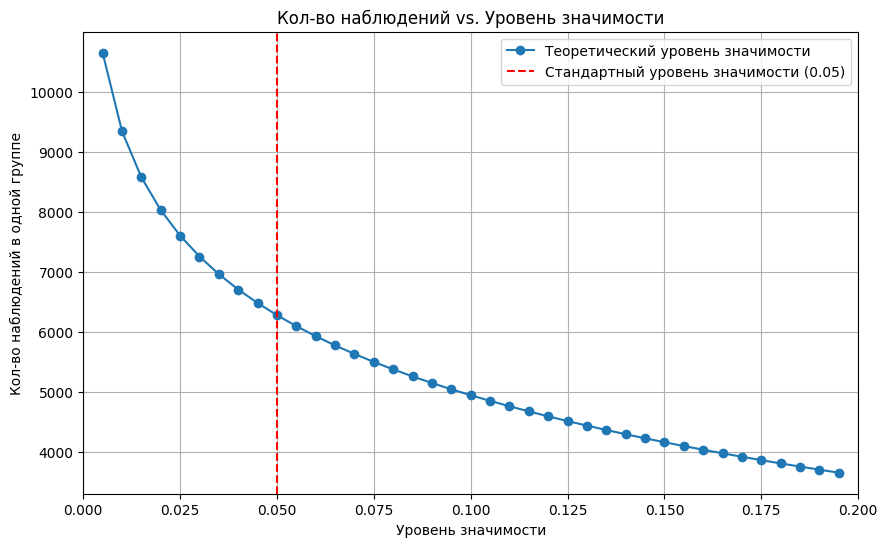

In [18]:
# Параметры
alphas = np.arange(0.005, 0.2, 0.005) # ошибка первого рода
power = 0.8 # мощность теста
mde = 0.05 # MDE
x = 100 # среднее базовое значение метрики
sigma = 100 # дисперсия нашей метрики

# Посчитаем кол-во наблюдений
n = np.array([num_of_observations(alpha, power, sigma**2, mde, x) for alpha in alphas])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(alphas, n, label='Теоретический уровень значимости', marker='o')
plt.title(f'Кол-во наблюдений vs. Уровень значимости')
plt.xlabel('Уровень значимости')
plt.ylabel('Кол-во наблюдений в одной группе')
plt.axvline(0.05, color='r', linestyle='--', label='Стандартный уровень значимости (0.05)')
plt.xlim(0, 0.2)
plt.grid(True)
plt.legend()
plt.show()

Чем больше выбранная мощность, тем больше нужно наблюдений, но также тем ниже шанс получить ошибку II рода.

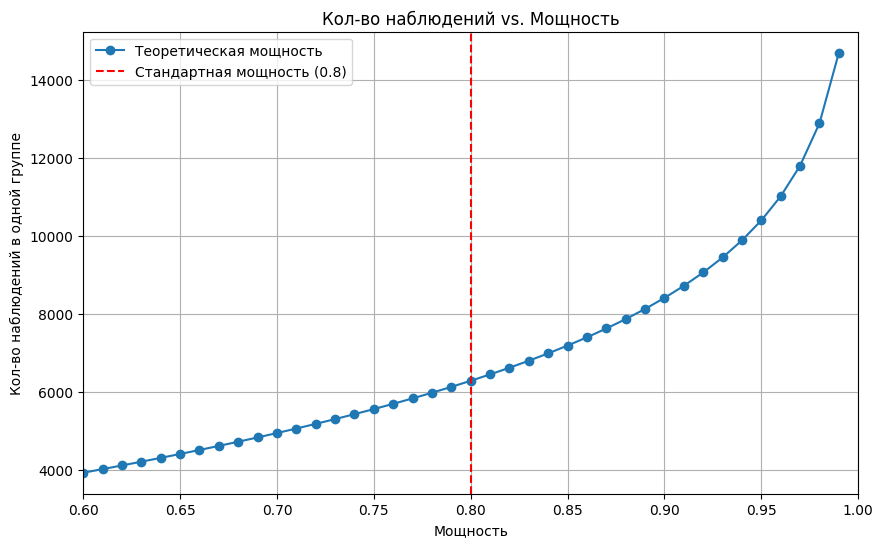

In [19]:
# Параметры
alpha = 0.05 # ошибка первого рода
powers = np.arange(0.6, 1.0, 0.01) # мощность теста
mde = 0.05 # MDE
x = 100 # среднее базовое значение метрики
sigma = 100 # дисперсия нашей метрики

# Посчитаем кол-во наблюдений
n = np.array([num_of_observations(alpha, power, sigma**2, mde, x) for power in powers])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(powers, n, label=f'Теоретическая мощность', marker='o')
plt.title(f'Кол-во наблюдений vs. Мощность')
plt.xlabel('Мощность')
plt.ylabel('Кол-во наблюдений в одной группе')
plt.axvline(0.8, color='r', linestyle='--', label='Стандартная мощность (0.8)')
plt.xlim(0.6, 1.0)
plt.legend()
plt.grid(True)
plt.show()

Чем меньше выбранный MDE, тем больше нужно наблюдений, чтобы засечь маленький эффект.

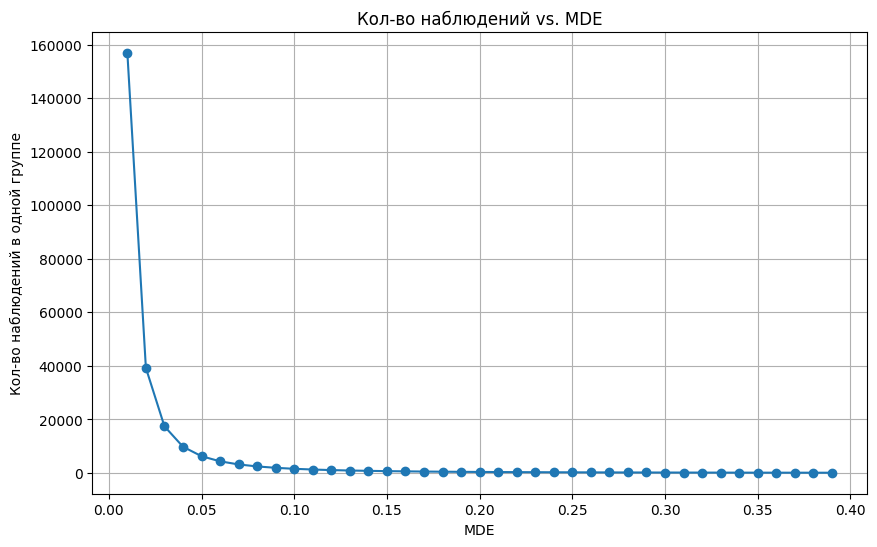

In [20]:
# Параметры
alpha = 0.05 # ошибка первого рода
power = 0.8 # мощность теста
mdes = np.arange(0.01, 0.4, 0.01) # MDE
x = 100 # среднее базовое значение метрики
sigma = 100 # дисперсия нашей метрики

# Посчитаем кол-во наблюдений
n = np.array([num_of_observations(alpha, power, sigma**2, mde, x) for mde in mdes])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(mdes, n, marker='o')
plt.title(f'Кол-во наблюдений vs. MDE')
plt.xlabel('MDE')
plt.ylabel('Кол-во наблюдений в одной группе')
plt.grid(True)
plt.show()

#### Бонус: зависимость кол-ва наблюдений от дисперсии метрики

Чем больше дисперсия (или стандартное отклонение) выбранной метрики **при фиксированном среднем значении метрики**, тем больше нужно наблюдений. Однако при смене метрики обычно меняется и среднее. Поэтому **важный вывод**: чем больше соотношение среднего к дисперсии у метрики, тем метрика более чувствительная, тем меньше наблюдений необходимо для эксперимента

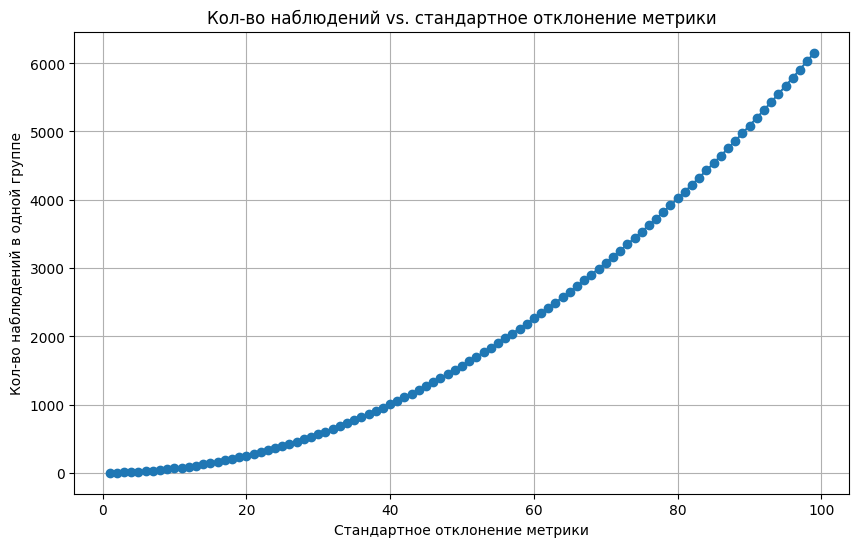

In [21]:
# Параметры
alpha = 0.05 # ошибка первого рода
power = 0.8 # мощность теста
mde = 0.05 # MDE
xs = 100 # среднее базовое значение метрики
sigmas = np.arange(1, 100, 1) # дисперсия нашей метрики

# Посчитаем кол-во наблюдений
n = np.array([num_of_observations(alpha, power, sigma**2, mde, x) for sigma in sigmas])

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(sigmas, n, marker='o')
plt.title(f'Кол-во наблюдений vs. стандартное отклонение метрики')
plt.xlabel('Стандартное отклонение метрики')
plt.ylabel('Кол-во наблюдений в одной группе')
plt.grid(True)
plt.show()

### Длительность эксперимента

После расчёта объёма наблюдений важно оценить, за сколько времени их можно собрать, учитывая еженедельное количество пользователей. Для этого общее количество наблюдений делят на число пользователей за неделю, получая длительность эксперимента в неделях. Результат округляют в большую сторону. Это необходимо, чтобы учесть сезонность, например, разное поведение пользователей в будние и выходные дни. Если пропустить данные выходных, можно получить искажённые результаты, так как активность пользователей может значительно отличаться в эти дни.

### Запуск эксперимента

Запуск эксперимента включает в себя технические моменты, однако существует важный аспект, который необходимо учесть. Разделение групп для эксперимента должно быть случайным — это ключевая предпосылка для корректного проведения A/B тестов.

A/B тесты предполагают сравнение групп, которые различаются лишь одним фактором — изменением, предлагаемым автором эксперимента. Неслучайное разделение может привести к искажению результатов из-за влияния других факторов. В таком случае A/B тест не сможет гарантировать причинно-следственную связь, то есть доказать, что наблюдаемый эффект обусловлен только тем изменением, которое изначально планировалось для проверки.

Рассмотрим, что может произойти, если данные разделить не случайным образом:

In [22]:
np.random.seed(42)
values = np.random.normal(loc=100, scale=10, size=1000)

# Нерандомное разделение
group_a = np.sort(values)[:500]
group_b = np.sort(values)[500:]

# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = -41.56508236459398, p-value = 5.8493291854432955e-220
t-тест показал наличие значимого отличия между группами


Сравним на тех же данных со случайным разбиением

In [23]:
np.random.seed(42)
values = np.random.normal(loc=100, scale=10, size=1000)

# Правильная рандомизация. Рандомно делим выборку группы A и B
group_a = np.random.choice(values, size=500)
group_b = np.random.choice(values, size=500)

# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = 0.0433518702670209, p-value = 0.9654297153827569
t-тест показал отсутствие значимых отличий между группами


Получаем противоположные результаты в сравнении с некорректной рандомизацией: p-value >= alpha, мы не можем отвергнуть нулевую гипотезу, и различия между группами не считаются статистически значимыми.

### Мониторинг

После начала, а иногда и во время, эксперимента полезно настроить дашборды и графики, отображающие ключевые метрики, а также показатели, которые помогут отслеживать «здоровье» эксперимента.

К показателям здоровья обычно относятся:

1. **Количество пользователей в группах** — важно следить за соотношением групп. Если эксперимент был настроен с равным распределением, а в реальности одна группа в два раза больше другой, это может свидетельствовать о возможной ошибке при настройке эксперимента.
   
2. **Контрольная метрика** — метрика, падение которой может сигнализировать о проблемах с экспериментом. Например, если выручка внезапно падает на 20%, это может быть основанием для немедленного прекращения эксперимента и возврата к исходным условиям.

3. **Косвенные метрики** — показатели, которые косвенно помогают оценить изменения в основной метрике. Например, конверсия в покупку может дать представление об изменениях в выручке.

4. **Динамика p-value** — помогает отслеживать изменения статистической значимости и убедиться в стабильности результата эксперимента.

### Подведение итогов эксперимента

Статистический анализ результатов эксперимента обычно включает следующие этапы:

1. **Проверка однородности групп** — проверяем, что до начала эксперимента группы были схожи между собой. Это важно для того, чтобы избежать неслучайного разделения, которое может повлиять на результаты.

2. **Подсчет метрик и анализ с помощью статистического критерия** — проводим анализ с использованием выбранного статистического теста для оценки значимости различий между группами.

После выполнения этих шагов, на основе предварительных договоренностей, тестируемое изменение либо внедряется и масштабируется, либо отклоняется.


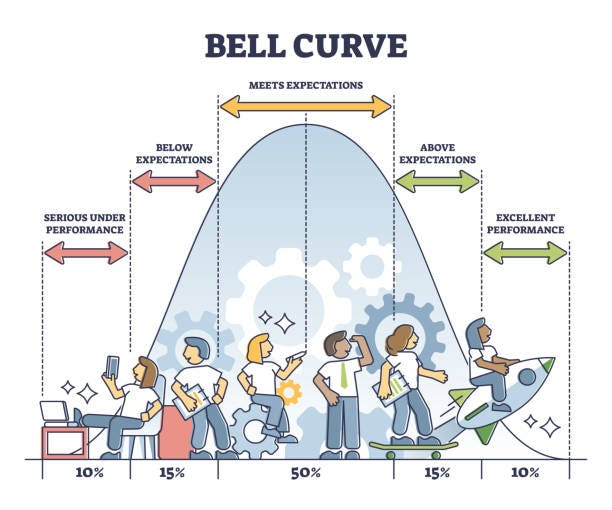

## Разберем пример

### Постановка задачи

**ML в банкинге:** внедрена модель, которая ранжирует карточки продуктов в мобильном приложении (например, показывать сначала вклад или страховку).

Необходимо оценить, оказывает ли модель влияние на поведение пользователей. В случае положительного результата — расширяем внедрение модели на всех пользователей.

Самый объективный способ проверить эффективность модели — провести А/B тест.

### Идея

**Какое изменение мы хотим внедрить в тестовой группе?**

- Группа А: карточки в приложении сортируются по умолчанию.
- Группа B: карточки в приложении ранжируются с использованием ML-модели, персонализированной для каждого пользователя.

Есть ли еще другие изменения, которые мы могли бы упустить?

### Метрика

**На какую метрику мы хотим повлиять?**

Метрики:
- Конверсия в клик на карточку
- Конверсия в оформление нового продукта
- Среднее количество новых продуктов у пользователя

Какая из этих метрик является наиболее подходящей? На какую следует ориентироваться при принятии решения?

### Параметры эксперимента

In [24]:
# параметры
alpha = 0.05 # ошибка первого рода
power = 0.8 # мощность теста
mde = 0.05 # MDE

Нужно посчитать базовое значение метрики и ее дисперсию

In [25]:
df = pd.read_csv('https://raw.githubusercontent.com/elizacc/sber/refs/heads/main/product_logs.csv')

In [26]:
df.head()

,client_id,group,date,click,open
0,2,test,2024-02-01,0,0
1,3,control,2024-02-01,0,0
2,8,control,2024-02-01,1,1
3,9,control,2024-02-01,0,0
4,13,control,2024-02-01,0,0


In [27]:
df['date'] = pd.to_datetime(df['date'])

before_exp = df[df['date'] < pd.to_datetime('2024-03-01')]

num_products_by_client = before_exp.groupby('client_id')['open'].sum()
x = num_products_by_client.mean() # среднее базовое значение метрики
sigma = num_products_by_client.std() # дисперсия нашей метрики

print(f'Базовое значение метрики: {x}')
print(f'Стандартное отклонение метрики: {sigma}')

Базовое значение метрики: 1.7422
Стандартное отклонение метрики: 1.2944136551625


### Длительность эксперимента

Теперь мы можем посчитать необходимое кол-во наблюдений и сколько времени нам понадобится, чтобы собрать такое кол-во наблюдений

In [28]:
n = num_of_observations(alpha, power, sigma**2, mde, x)

before_exp['week'] = before_exp['date'].dt.isocalendar().week
avg_wau = before_exp.groupby('week')['client_id'].nunique().mean()
weeks = ceil(n / avg_wau)

print(f'Необходимое кол-во наблюдений: {n}')
print(f'Среднее кол-во посетителей в неделю: {avg_wau}')
print(f'Необходимое кол-во недель: {weeks}')

Необходимое кол-во наблюдений: 3466.153680855353
Среднее кол-во посетителей в неделю: 9722.4
Необходимое кол-во недель: 1


### Запуск эксперимента

В нашем случае нам уже предоставили данные по итогу эксперимента, поэтому мы пропускаем этот шаг.

Однако помним, что деление должно быть случайным и на следующем шаге проверим это

### Мониторинг

Построим необходимые графики:

1. Основная метрика — среднее количество новых продуктов.
2. Количество пользователей в группах.
3. Контрольная метрика — в данном случае, поскольку эксперимент завершен, в данной метрике нет необходимости.
4. Косвенные метрики — конверсия в клик, конверсия в оформление продукта.
5. Динамика p-value эксперимента.

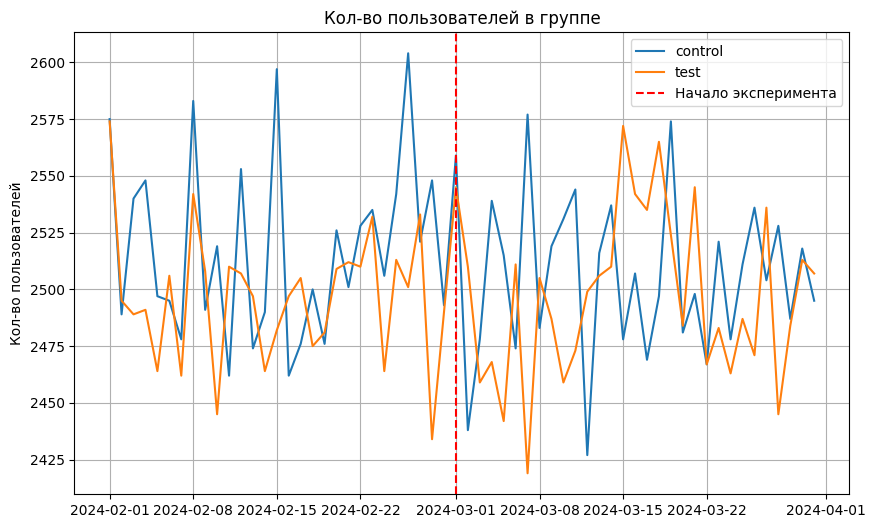

In [29]:
num_clients = df.groupby(['group', 'date'])['client_id'].nunique().reset_index()
dates = df['date'].unique()

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dates, num_clients[num_clients['group']=='control']['client_id'], label=f'control')
plt.plot(dates, num_clients[num_clients['group']=='test']['client_id'], label=f'test')
plt.title(f'Кол-во пользователей в группе')
plt.ylabel('Кол-во пользователей')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', label='Начало эксперимента')
plt.legend()
plt.grid(True)
plt.show()

Кол-во пользователей в группах примерно одинаковое, группы не разъехались

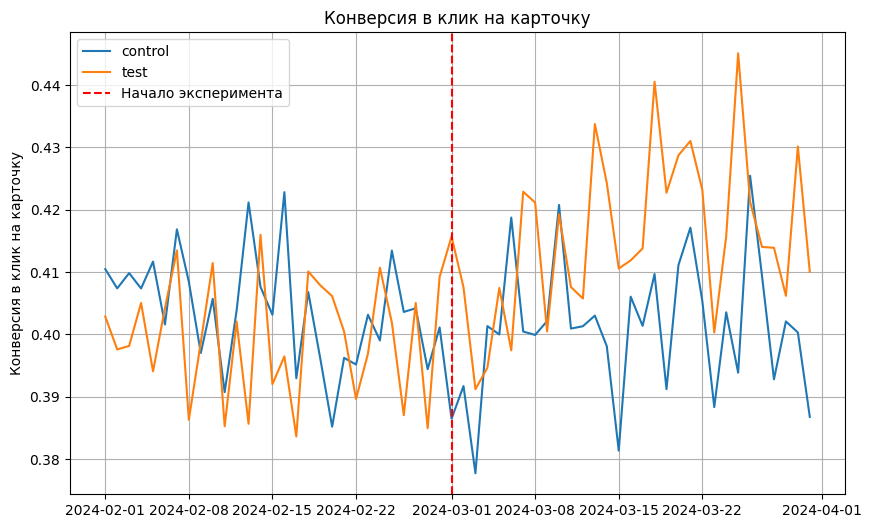

In [30]:
click_conversion = df.groupby(['group', 'date'])['click'].mean().reset_index()
dates = df['date'].unique()

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dates, click_conversion[click_conversion['group']=='control']['click'], label=f'control')
plt.plot(dates, click_conversion[click_conversion['group']=='test']['click'], label=f'test')
plt.title(f'Конверсия в клик на карточку')
plt.ylabel('Конверсия в клик на карточку')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', label='Начало эксперимента')
plt.legend()
plt.grid(True)
plt.show()

Видим, что до эксперимента группы почти не отличались - после конверсия в клик в тестовой группе выросла

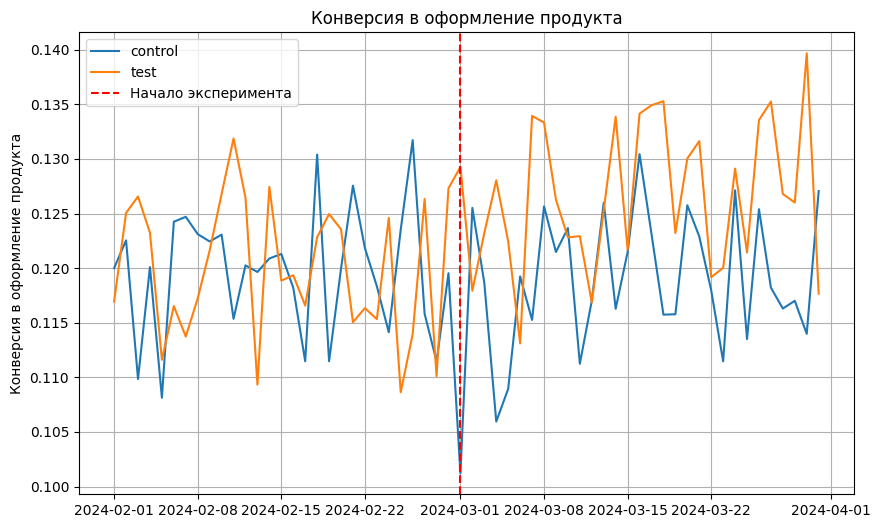

In [31]:
open_conversion = df.groupby(['group', 'date'])['open'].mean().reset_index()
dates = df['date'].unique()

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dates, open_conversion[open_conversion['group']=='control']['open'], label=f'control')
plt.plot(dates, open_conversion[open_conversion['group']=='test']['open'], label=f'test')
plt.title(f'Конверсия в оформление продукта')
plt.ylabel('Конверсия в оформление продукта')
plt.axvline(pd.to_datetime('2024-03-01'), color='r', linestyle='--', label='Начало эксперимента')
plt.legend()
plt.grid(True)
plt.show()

Аналогично, конверсия в оформление продукта тоже стала побольше в тестовой группе, а до эксперимента они были одинаковы

**А где кол-во новых открытых продуктов?**

Однако, чтобы понять, есть ли отличие, нужно провести тест. Как мы знаем, иногда визуальный анализ дает менее точные результаты, чем расчеты

Но перед этим построим дополнительно график с динамикой p-value. Для этого на каждый день эксперимента посчитаем суммарные данные за все дни до него и вычислим значение p-value на их основании

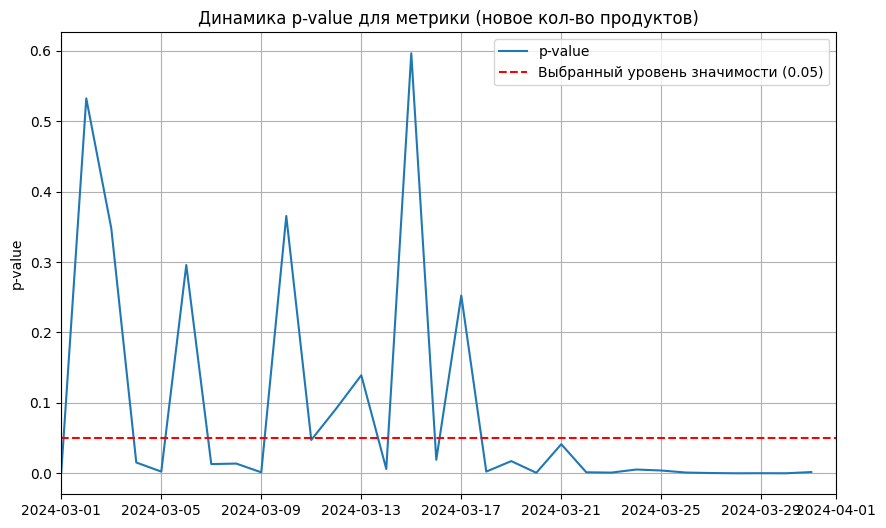

In [32]:
exp = df[df['date'] >= pd.to_datetime('2024-03-01')]

p_values = []
exp['new_products_cumsum'] = exp.groupby(['group', 'client_id'])['open'].transform('cumsum')
for day in dates:
    group_a = exp[(exp['group']=='control')&(exp['date']==day)]['new_products_cumsum']
    group_b = exp[(exp['group']=='test')&(exp['date']==day)]['new_products_cumsum']
    t_stat, p_value = stats.ttest_ind(group_a, group_b)
    p_values.append(p_value)

# Визуализация
plt.figure(figsize=(10, 6))
plt.plot(dates, p_values, label='p-value')
plt.ylabel('p-value')
plt.title(f'Динамика p-value для метрики (новое кол-во продуктов)')
plt.xlim(pd.to_datetime('2024-03-01'), pd.to_datetime('2024-04-01'))
plt.axhline(alpha, color='r', linestyle='--', label='Выбранный уровень значимости (0.05)')
plt.grid(True)
plt.legend()
plt.show()

Мы видим, что к концу эксперимента p-value стабилизировалось на уровне около нуля и уверенно остается ниже критического значения (<0.05). Это указывает на то, что маловероятно, что p-value случайно оказалось в этой области, в отличие от первых колебаний, которые наблюдались еще на первой неделе эксперимента.

### Подведение итогов эксперимента

На этапе мониторинга мы уже увидели, что группы до теста были похожи, поэтому предполагаем, что разбиение случайное и не искажает результаты. Теперь проверим итоги t-тестом

In [33]:
group_a = exp[(exp['group']=='control')].groupby('client_id')['open'].sum()
group_b = exp[(exp['group']=='test')].groupby('client_id')['open'].sum()

#### Задание 3

Напишите код для использования t-теста, чтобы сравнить группы А и B.

- Вы можете воспользоваться функцией stat.ttest_ind(group_a, group_b), которую мы использовали ранее.
- Вы можете выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:

  Кликните на данную ссылку https://chat.mistral.ai/;
  Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
  На рабочем столе нажмите на ссылку, которая ведет к чату.
  Если вы хотите использовать другую модель, вот ссылки:

  DeepSeek: https://www.deepseek.com/
  GigaChat: https://giga.chat/
  Промпт для этой задачи необходимо придумать самостоятельно.

In [35]:
# Проведем t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b) # ваш код
print(f'Результаты T-test: t-statistic = {t_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('t-тест показал наличие значимого отличия между группами')
else:
    print('t-тест показал отсутствие значимых отличий между группами')

Результаты T-test: t-statistic = -4.804210006900838, p-value = 1.5762252613334757e-06
t-тест показал наличие значимого отличия между группами


Получили, что между группами есть значимое отличие и оно в пользу тестовой группы. Посчитаем, насколько выросла метрика

In [36]:
group_a.mean(), group_b.mean()

(1.838619589068422, 1.9677160617605776)

In [37]:
group_b.mean() / group_a.mean() - 1

0.0702138024960155

Получили, что среднее кол-во новых продуктов у пользователей выросло на 7% и подтвердили, что отличие статистически значимое. **Общий вывод:** по установленным договоренностям раскатываем новую модель на всех пользователей

#### Бонус: тест Манна-Уитни

Однако не всегда получается использовать t-тест или z-тест. Иногда распределение слишком перекошенное, чтобы использовать один из них. В таком случае можно использовать непараметрические тесты, которые не делают предположения о распределении данных. Одним из них является ранговый тест Манна-Уитни, широко используемый в индустрии.

Предположим, у нас есть две выборки данных: $X$ и $Y$, каждая из них содержит $n_1$ и $n_2$ наблюдений соответственно.

1. **Ранжирование данных**:

   Для каждой выборки ранжируются все значения от самого низкого до самого высокого. Если в данных есть повторяющиеся значения, то присваиваются средние значения рангов для повторяющихся наблюдений. Обозначим ранги как \($R_{X_i}$\) для выборки \($X$\) и \($R_{Y_i}$\) для выборки \($Y$\).

2. **Вычисление статистики U**:

   Статистика U вычисляется следующим образом:
   
   
   $$U = \min(U_X, U_Y)$$
   
   
   Где:
   
   $$
   U_X = n_1 \times n_2 + \frac{n_1(n_1 + 1)}{2} - \sum_{i=1}^{n_1} R_{X_i}
   $$
   
   $$
   U_Y = n_1 \times n_2 + \frac{n_2(n_2 + 1)}{2} - \sum_{i=1}^{n_2} R_{Y_i}
   $$

3. **Определение критического значения и принятие решения**:

   Существуют таблицы критических значений для критерия Манна-Уитни при различных уровнях значимости и размерах выборки.

   После вычисления статистики U необходимо определить критическое значение, которое зависит от выбранного уровня значимости (обычно 0.05). Если полученное значение статистики U меньше критического значения, то нулевая гипотеза отвергается в пользу альтернативной. В противном случае, нулевая гипотеза не отвергается.

#### Бонусное задание

Проведите тест Манна-Уитни для проверки разницы в кол-ве новых продуктов между группами теста

**Давайте попробуем выполнить данное задание с помощью модели Mistral. Чтобы воспользоваться чатом, есть несколько вариантов:**

1. Кликните на данную ссылку https://chat.mistral.ai/;
2. Скопируйте данную ссылку https://chat.mistral.ai/ и вставьте ее в поисковую строку любого адреса;
3. На рабочем столе нажмите на ссылку, которая ведет к чату.

Если вы хотите использовать другую модель, вот ссылки:
- DeepSeek: https://www.deepseek.com/
- GigaChat: https://giga.chat/

Промпт для этой задачи необходимо придумать самостоятельно.

In [41]:
#ваш код
from scipy.stats import mannwhitneyu

np.random.seed(3)
group_a = np.random.normal(loc=100, scale=100, size=1000)
group_b = np.random.normal(loc=120, scale=100, size=1000)

# Проведение теста Манна-Уитни
stat, p_value = mannwhitneyu(group_a, group_b, alternative='two-sided')

# Вывод результатов
print(f"Статистика теста: {stat}")
print(f"P-value: {p_value}")

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отклоняем нулевую гипотезу: есть статистически значимая разница между группами.")
else:
    print("Не можем отклонить нулевую гипотезу: нет статистически значимой разницы между группами.")


Статистика теста: 471487.0
P-value: 0.027243100820686962
Отклоняем нулевую гипотезу: есть статистически значимая разница между группами.


#### z-тест для пропорций
Посчитаем также критерий для конверсии в оформление. Для метрик конверсии есть специальный тип z-теста: z-тест для пропорций. Статистика в таком случае выглядит следующим образом:

$$Z = \frac{p_A - p_B}{\sqrt{\hat{p} \cdot (1 - \hat{p}) \cdot (\frac{1}{n_A} + \frac{1}{n_B})}}, $$

где $\hat{p} = \frac{X_A + X_B}{n_A + n_B}$, $X_A$ - кол-во пользователей с оформлениями продуктов в группе А, $X_B$ - кол-во пользователей с оформлениям продуктов в группе B. Обычно для пропорций используется он, так как учитывает особенность распределения подобных метрик, что делает тест более мощным



In [42]:
# Считаем каждое значение
X_a = sum(group_a > 0)
X_b = sum(group_b > 0)
n_a = len(group_a)
n_b = len(group_b)

In [43]:
# Проведем z-test
z_stat, p_value = proportion.proportions_ztest([X_a, X_b], [n_a, n_b])
print(f'Результаты Z-test: z-statistic = {z_stat}, p-value = {p_value}')
if p_value < 0.05:
    print('z-тест показал наличие значимого отличия между группами')
else:
    print('z-тест показал отсутствие значимых отличий между группами')

Результаты Z-test: z-statistic = -0.6897948252470983, p-value = 0.49032322335641954
z-тест показал отсутствие значимых отличий между группами


In [44]:
X_a / n_a, X_b / n_b

(0.845, 0.856)

In [45]:
X_b / n_b / (X_a / n_a) - 1

0.013017751479289963

Получили, что конверсия в оформление новых продуктов у пользователей выросла на 2% и подтвердили, что отличие статистически значимое. Это еще одно косвенное подтверждение наличия разница между группами и аргумент в пользу вывода модели в прод.

# Выводы

На этом семинаре Вы:

* Ознакомились с полным процессом проведения A/B теста

* Освоили методы тестирования гипотез и проведения A/B тестов

* Узнали, как тестировать значимость различий между средними значениями и пропорциями.